<h2>Importing Libraries and Dataset</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#Importing the data
alzheimers_data = pd.read_csv("data/AlzheimersData.csv")

In [4]:
#Checking the dataset
alzheimers_data.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


<h2>Data Cleaning</h2>

In [6]:
columns_to_drop = [
    'RowId', 'Datasource', 'Data_Value_Unit', 
    'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 
    'Geolocation'
]
alzheimers_data_cleaned = alzheimers_data.drop(columns=columns_to_drop, errors='ignore')

print("Dropped irrelevant columns.")

Dropped irrelevant columns.


In [7]:
# Handle missing values
initial_shape = alzheimers_data_cleaned.shape
alzheimers_data_cleaned = alzheimers_data_cleaned.dropna(subset=['Data_Value'])
final_shape = alzheimers_data_cleaned.shape
print(f"Dropped {initial_shape[0] - final_shape[0]} rows with missing Data_Value.")

Dropped 91334 rows with missing Data_Value.


In [8]:
alzheimers_data_cleaned.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,DataValueTypeID,Data_Value_Type,Data_Value,...,StratificationCategory2,Stratification2,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
3,2022,2022,MD,Maryland,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,PRCTG,Percentage,9.0,...,Race/Ethnicity,"Black, non-Hispanic",C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,2022,2022,WI,Wisconsin,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,PRCTG,Percentage,5.6,...,Gender,Male,C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
6,2022,2022,OK,Oklahoma,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,PRCTG,Percentage,21.5,...,Race/Ethnicity,Native Am/Alaskan Native,C05,TMC01,Q03,40,AGE,AGE_OVERALL,RACE,NAA
7,2022,2022,PA,Pennsylvania,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,PRCTG,Percentage,10.0,...,Race/Ethnicity,"White, non-Hispanic",C05,TMC01,Q03,42,AGE,AGE_OVERALL,RACE,WHT
8,2022,2022,PA,Pennsylvania,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,PRCTG,Percentage,39.9,...,Gender,Female,C01,TOC10,Q46,42,AGE,AGE_OVERALL,GENDER,FEMALE


<h2>Visualizing the Data</h2>

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


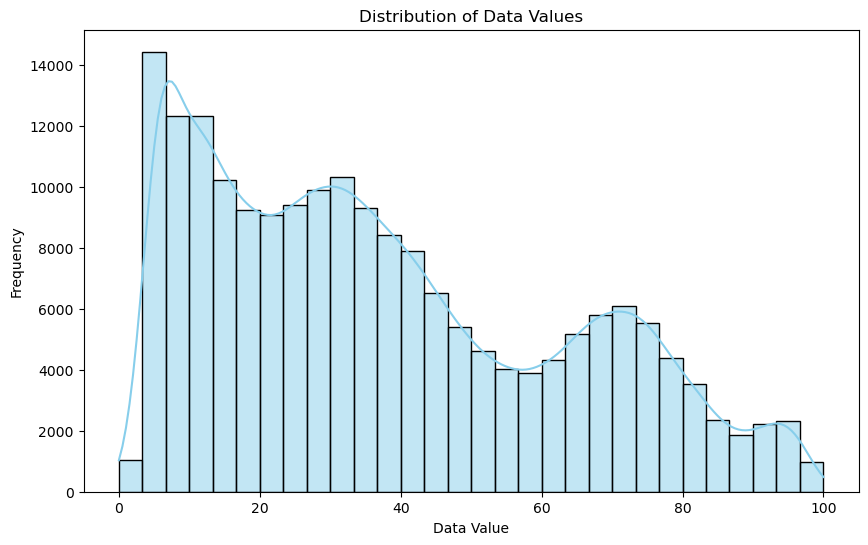

In [10]:
# Distribution of Data Values
plt.figure(figsize=(10, 6))
sns.histplot(alzheimers_data_cleaned['Data_Value'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

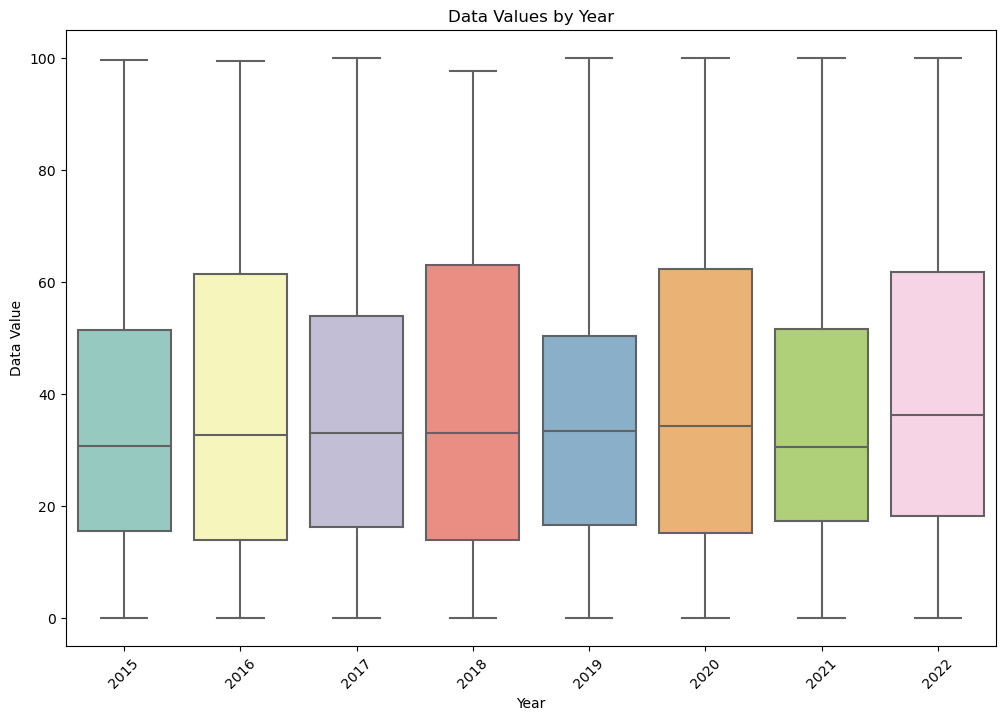

In [11]:
# Boxplot of Data Values by Year
plt.figure(figsize=(12, 8))
sns.boxplot(x='YearStart', y='Data_Value', data=alzheimers_data_cleaned, palette='Set3')
plt.title('Data Values by Year')
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Feature Selection and Preprocessing
features = ['YearStart', 'LocationID', 'ClassID', 'TopicID', 'QuestionID']

# Ensure all features are present
for feature in features:
    if feature not in alzheimers_data_cleaned.columns:
        raise ValueError(f"Feature {feature} not found in the dataset.")

X = alzheimers_data_cleaned[features]

In [13]:
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['LocationID', 'ClassID', 'TopicID', 'QuestionID'], drop_first=True)

# Check for NaN values in the feature set
if X.isnull().values.any():
    raise ValueError("Feature set contains NaN values. Consider imputing or dropping these values.")

In [14]:
# Target variable: Binary classification based on median Data_Value
y = alzheimers_data_cleaned['Data_Value'].apply(lambda x: 1 if x > np.median(alzheimers_data_cleaned['Data_Value']) else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<h2>Model Training</h2>

In [16]:
# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

In [17]:
# Model Training
model_performance = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    model_performance[model_name] = {
        'model': model,
        'accuracy': acc,
        'report': report
    }
    print(f"{model_name} Accuracy: {acc:.4f}")
    print(f"{model_name} Classification Report:\n{report}")

RandomForest Accuracy: 0.9019
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     19336
           1       0.90      0.91      0.90     19226

    accuracy                           0.90     38562
   macro avg       0.90      0.90      0.90     38562
weighted avg       0.90      0.90      0.90     38562

LogisticRegression Accuracy: 0.8840
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     19336
           1       0.88      0.88      0.88     19226

    accuracy                           0.88     38562
   macro avg       0.88      0.88      0.88     38562
weighted avg       0.88      0.88      0.88     38562



C:\Users\1234\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Selecting the Best Model
best_model_name = max(model_performance, key=lambda x: model_performance[x]['accuracy'])
best_model = model_performance[best_model_name]['model']
best_accuracy = model_performance[best_model_name]['accuracy']
print(f"\nBest model: {best_model_name} with accuracy {best_accuracy:.4f}")


Best model: RandomForest with accuracy 0.9019


In [19]:
# Save the Best Model
model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Best model saved to {model_filename}")

Best model saved to best_model.pkl


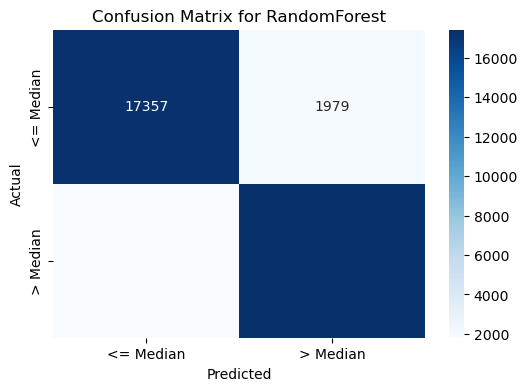

In [20]:
# Save Confusion Matrix
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<= Median', '> Median'], yticklabels=['<= Median', '> Median'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()